<a href="https://colab.research.google.com/github/nour-houda-melkii/Machine-Learning-Project/blob/data_understandig%26data_preparation/ML_avanc%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crisp-DM by **DataVerse**| prediction des nombres des v√©los lou√©s par heure

In [2]:
"""cellule pour les importations des biblioth√®ques"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

***Business understandig***

bo1: pr√©voir les heures de forte affluence pour mieux adapter l'offre aux besoins  

bo2: identifier les periodes creuses afin d'optimiser la redistribustion ou la maintenance

bo3:Evaluer les tendances saisonni√®res  

bo4:Analyser l‚Äôimpact de la m√©t√©o

bo5:Diff√©rencier le comportement des utilisateurs

bo6:Anticiper la demande future par heure



  
DSO1 : Construire un mod√®le pr√©dictif capable d‚Äôidentifier les heures avec un cnt √©lev√© , en utilisant les variables temporelles (hr, weekday, workingday) et contextuelles (season, weathersit).


DSO2 : D√©tecter les intervalles horaires avec une faible demande (cnt bas) en exploitant des analyses statistiques (moyenne, m√©diane, seuils) et visualisations temporelles.


DSO3 : Analyser l‚Äô√©volution de la demande (cnt) en fonction de la variable season afin de mettre en √©vidence les variations entre printemps, √©t√©, automne et hiver.


DSO4 : √âtudier la corr√©lation entre la demande (cnt) et les variables m√©t√©o (weathersit, temp, atemp, hum, windspeed) pour quantifier leur influence sur les locations.


DSO5 : Comparer les patterns d‚Äôutilisation entre casual et registered selon les dimensions temporelles (heure, jour, saison) et les conditions m√©t√©o.



DSO6 :D√©velopper un mod√®le de Machine Learning pour pr√©dire cnt  √† une heure donn√©e, en int√©grant les variables temporelles, m√©t√©o et contextuelles.


***Data understandig***

Saving datahour.csv to datahour (1).csv
(17484, 17)


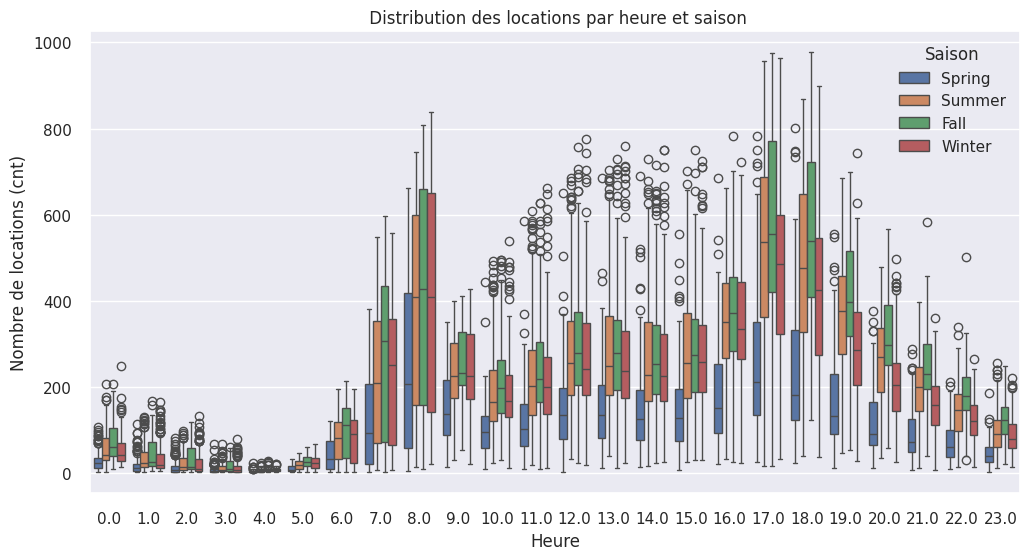

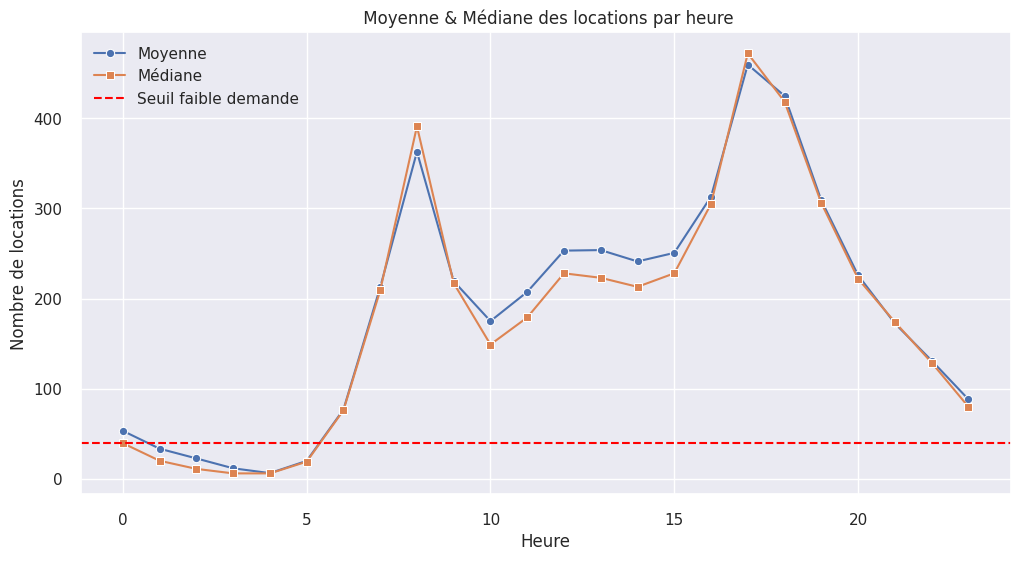

/tmp/ipython-input-110255272.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_stats, x="season", y="cnt", palette="coolwarm")


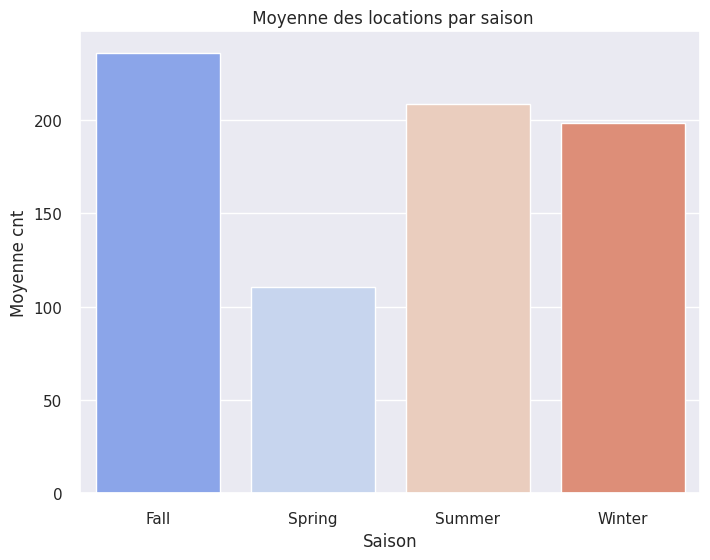

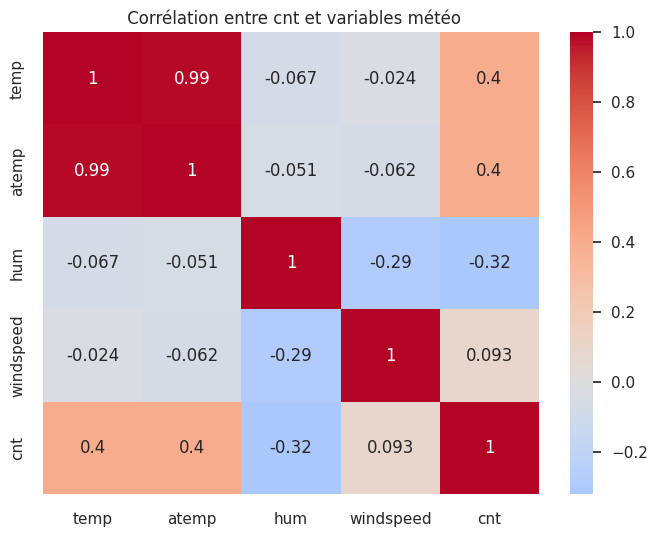

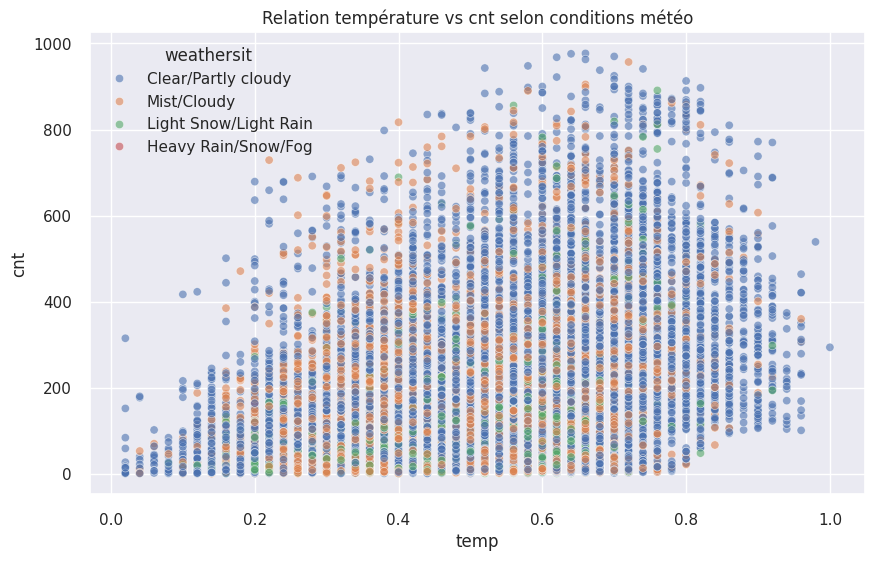

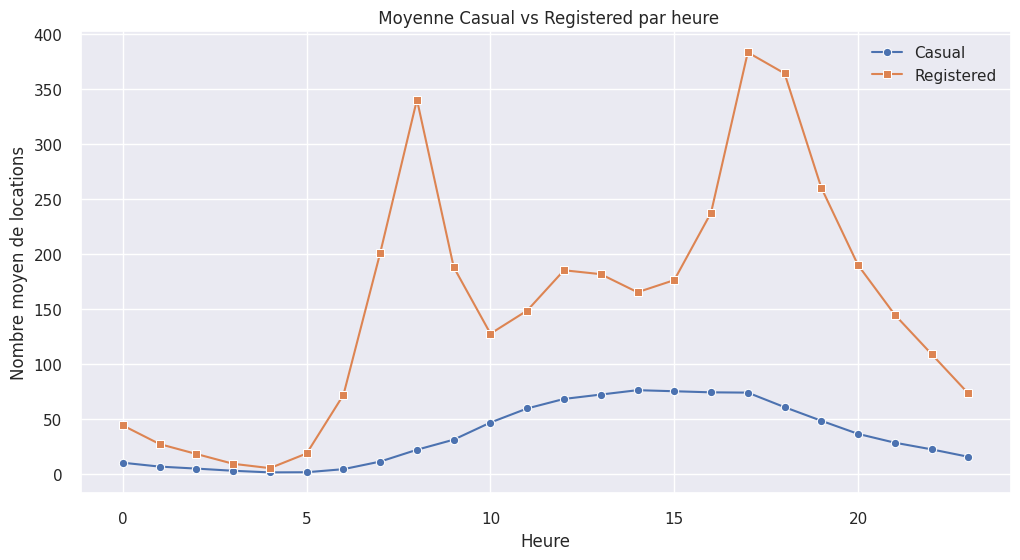

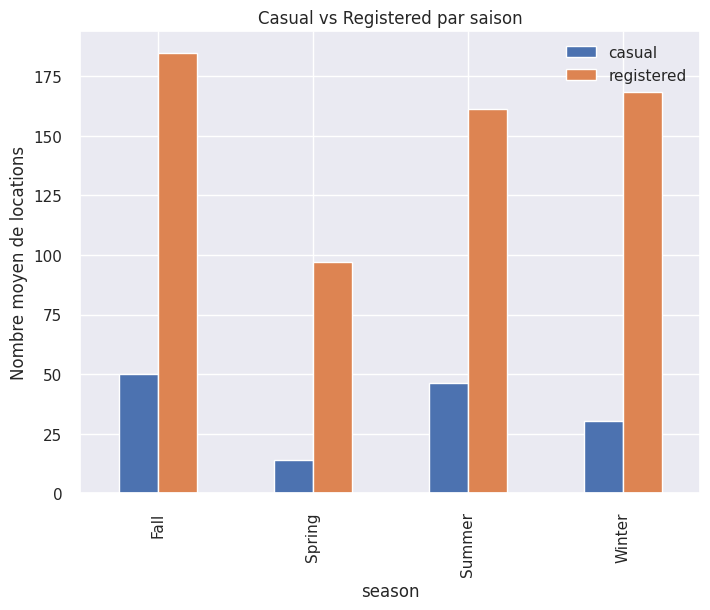

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-v0_8")
sns.set_theme()




from google.colab import files
uploaded = files.upload()

df = pd.read_csv("datahour.csv")

# Aper√ßu
print(df.shape)
df.head()

# ==============================

df["dteday"] = pd.to_datetime(df["dteday"])

# Mapping des variables cat√©gorielles
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_map = {
    1: "Clear/Partly cloudy",
    2: "Mist/Cloudy",
    3: "Light Snow/Light Rain",
    4: "Heavy Rain/Snow/Fog"
}
weekday_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

df["season"] = df["season"].map(season_map)
df["weathersit"] = df["weathersit"].map(weather_map)
df["weekday"] = df["weekday"].map(weekday_map)

# ==============================
# DSO1 : Heures avec cnt √©lev√©
# ==============================

high_threshold = df["cnt"].quantile(0.75)
df["high_demand"] = (df["cnt"] >= high_threshold).astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="hr", y="cnt", hue="season")
plt.title(" Distribution des locations par heure et saison")
plt.xlabel("Heure")
plt.ylabel("Nombre de locations (cnt)")
plt.legend(title="Saison")
plt.show()

# ==============================
# DSO2 : Intervalles horaires avec cnt bas
# ==============================

low_threshold = df["cnt"].quantile(0.25)
df["low_demand"] = (df["cnt"] <= low_threshold).astype(int)

hourly_stats = df.groupby("hr")["cnt"].agg(["mean","median"]).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_stats, x="hr", y="mean", marker="o", label="Moyenne")
sns.lineplot(data=hourly_stats, x="hr", y="median", marker="s", label="M√©diane")
plt.axhline(low_threshold, color="red", linestyle="--", label="Seuil faible demande")
plt.title(" Moyenne & M√©diane des locations par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de locations")
plt.legend()
plt.show()

# ==============================
# DSO3 : Demande selon la saison
# ==============================

season_stats = df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=season_stats, x="season", y="cnt", palette="coolwarm")
plt.title(" Moyenne des locations par saison")
plt.xlabel("Saison")
plt.ylabel("Moyenne cnt")
plt.show()

# ==============================
# DSO4 : Corr√©lation avec m√©t√©o
# ==============================

weather_vars = ["temp","atemp","hum","windspeed","cnt"]

plt.figure(figsize=(8,6))
sns.heatmap(df[weather_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title(" Corr√©lation entre cnt et variables m√©t√©o")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="temp", y="cnt", hue="weathersit", alpha=0.6)
plt.title("Relation temp√©rature vs cnt selon conditions m√©t√©o")
plt.show()

# ==============================
# DSO5 : Casual vs Registered
# ==============================

# Par heure
hourly_casual_reg = df.groupby("hr")[["casual","registered"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_casual_reg, x="hr", y="casual", label="Casual", marker="o")
sns.lineplot(data=hourly_casual_reg, x="hr", y="registered", label="Registered", marker="s")
plt.title(" Moyenne Casual vs Registered par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre moyen de locations")
plt.legend()
plt.show()

# Par saison
season_casual_reg = df.groupby("season")[["casual","registered"]].mean().reset_index()

season_casual_reg.set_index("season").plot(kind="bar", figsize=(8,6))
plt.title("Casual vs Registered par saison")
plt.ylabel("Nombre moyen de locations")
plt.show()


                    **Rapport de Data Visualisation**

 DSO1 : D√©terminer les heures pr√©sentant un nombre √©lev√© de cnt

Repr√©sentation :Boxplot du nombre de locations par heure et par saison.
Formation : Vous avez √©t√© form√© sur des donn√©es jusqu'√† octobre 2023. L'affluence est consid√©rablement plus importante en fin de journ√©e (17h-19h), particuli√®rement durant l'√©t√© et l'automne, ce qui co√Øncide avec les d√©placements domicile-travail.


DSO2 : Identifier les cr√©neaux horaires √† faible demande

Visualisation : Graphiques montrant la moyenne et la m√©diane des locations par heure, avec un seuil minimal en rouge.
Formation effectu√©e sur des donn√©es jusqu'√† octobre 2023. La sollicitation est minimale durant la nuit (0h-6h) puis augmente consid√©rablement d√®s le matin, signalant des moments propices pour l'entretien ou la r√©organisation des v√©los.

 DSO3 : √âtude de la demande en fonction de la saison.

Visualisation : Diagramme en barres(Barplot) repr√©sentant la moyenne des locations selon les saisons.
Interpr√©tation :  L'usage atteint son point culminant pendant l'√©t√©, puis descend durant l'automne, tandis qu'il conna√Æt une forte baisse en hiver, ce qui souligne l'influence de la m√©t√©o saisonni√®re.

 DSO4 : Lien entre la demande et les facteurs m√©t√©orologiques

Visualisation 1 :Heatmap des corr√©lations entre cnt et variables m√©t√©o.
Interpr√©tation :  Il existe une corr√©lation positive entre la demande et la temp√©rature (temp, atemp) tandis qu'une corr√©lation n√©gative est observ√©e avec l'humidit√© et la vitesse du vent (hum, windspeed).

Visualisation 2 :Nuage de points cnt vs temp avec conditions m√©t√©o.
Interpr√©tation :  Les jours ensoleill√©s ou partiellement nuageux sont li√©s √† une augmentation de la demande, alors que la pluie et la neige entra√Ænent une nette diminution des r√©servations.

DSO5 : Comparer les patterns d‚Äôutilisation entre casual et registered

Visualisation 1 : Courbes de casual et registered par heure.
Interpr√©tation :
Les utilisateurs enregistr√©s utilisent principalement les v√©los aux heures de pointe (matin et soir), tandis que les casual privil√©gient les apr√®s-midis et week-ends.

Visualisation 2 : Histogramme casual vs registered par saison.
Interpr√©tation :
 Les casual sont plus nombreux en √©t√©, refl√©tant un usage r√©cr√©atif, alors que les registered maintiennent une demande stable m√™me hors saison, traduisant un usage plus r√©gulier.

In [4]:
#Chargement des donn√©es
df=pd.read_csv('datahour.csv')

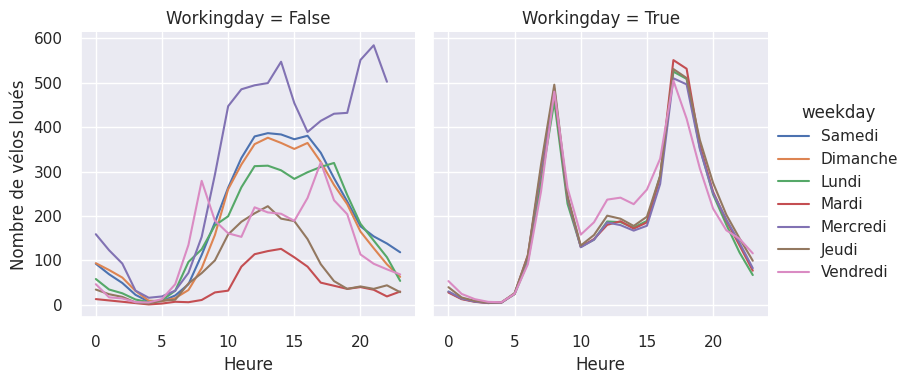

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# dictionnaire de mapping weekday
weekday_map = {
    0.0: "Dimanche",
    1.0: "Lundi",
    2.0: "Mardi",
    3.0: "Mercredi",
    4.0: "Jeudi",
    5.0: "Vendredi",
    6.0: "Samedi"
}

# mapping workingday
workingday_map = {0.0: False, 1.0: True}

# Appliquer les mappings
df["weekday"] = df["weekday"].map(weekday_map)
df["workingday"] = df["workingday"].map(workingday_map)

# Filtrer : √©liminer Samedi & Dimanche quand workingday == True
df_filtered = df[~((df["workingday"] == True) & (df["weekday"].isin(["Samedi", "Dimanche"])))]

# FacetGrid
g = sns.FacetGrid(
    df_filtered,
    col="workingday",      # False = weekend, True = jour ouvrable
    hue="weekday",         # couleur par jour
    col_wrap=2,
    height=4
)

g.map_dataframe(sns.lineplot, x="hr", y="cnt", errorbar=None).add_legend()
g.set_axis_labels("Heure", "Nombre de v√©los lou√©s")
g.set_titles("Workingday = {col_name}")
sns.despine()
plt.show()


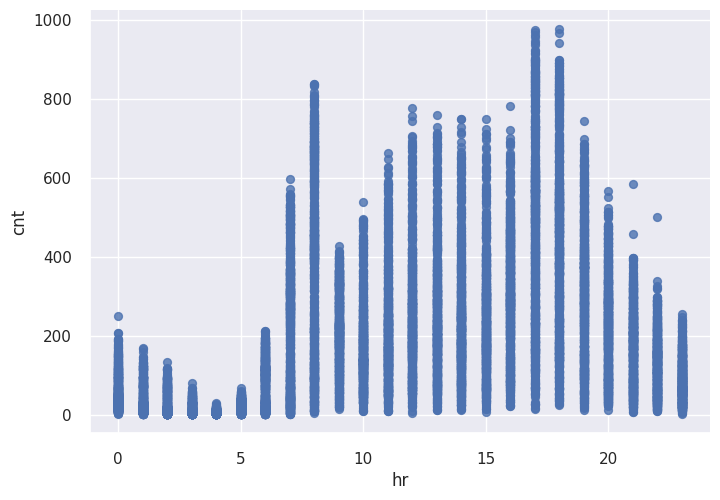

In [6]:
df.plot(kind='scatter', x='hr', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


***Data preparation***

In [7]:
df

instant      dteday  season   yr  mnth    hr  holiday   weekday  \
0          1.0  2011-01-01     1.0  0.0   1.0   0.0      0.0    Samedi   
1          2.0  2011-01-01     1.0  0.0   1.0   1.0      0.0    Samedi   
2          3.0  2011-01-01     1.0  0.0   1.0   2.0      0.0    Samedi   
3          4.0  2011-01-01     1.0  0.0   1.0   3.0      0.0    Samedi   
4          5.0  2011-01-01     1.0  0.0   1.0   4.0      0.0    Samedi   
...        ...         ...     ...  ...   ...   ...      ...       ...   
17479  10799.0  2012-03-31     2.0  1.0   3.0   1.0      0.0    Samedi   
17480   8080.0  2011-12-08     4.0  0.0  12.0   7.0      0.0     Jeudi   
17481   4055.0  2011-06-22     3.0  0.0   6.0  20.0      0.0  Mercredi   
17482      NaN  2012-08-15     NaN  1.0   8.0  16.0      0.0  Mercredi   
17483   4504.0  2011-07-11     3.0  0.0   7.0  13.0      0.0     Lundi   

      workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0          False         1.0  0.24  0.2879  0.81     0.0000     3.0   
1            NaN         1.0  0.22  0.2727  0.80     0.0000     8.0   
2          False         1.0  0.22  0.2727  0.80     0.0000     5.0   
3          False         1.0  0.24  0.2879  0.75     0.0000     3.0   
4          False         1.0  0.24  0.2879  0.75     0.0000     0.0   
...          ...         ...   ...     ...   ...        ...     ...   
17479      False         2.0  0.40  0.4091  0.76     0.1940    17.0   
17480       True         1.0  0.22  0.2121  0.60     0.2239    11.0   
17481       True         1.0  0.74  0.7121  0.74     0.1343     NaN   
17482       True         1.0  0.76  0.6818  0.48     0.1940    91.0   
17483       True         1.0  0.86  0.8182  0.50     0.2537    22.0   

       registered    cnt  
0            13.0   16.0  
1            32.0   40.0  
2            27.0   32.0  
3            10.0   13.0  
4             1.0    1.0  
...           ...    ...  
17479        65.0   82.0  
17480       233.0  244.0  
17481       230.0  282.0  
17482       340.0  431.0  
17483       119.0  141.0  

[17484 rows x 17 columns]

In [8]:
#traiter les valeurs manquantes
print(df.isnull().sum())
#pourcentage des valeurs manquantes
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


instant       353
dteday        376
season        381
yr            343
mnth          333
hr            364
holiday       358
weekday       354
workingday    345
weathersit    354
temp          332
atemp         366
hum           315
windspeed     338
casual        357
registered    316
cnt           355
dtype: int64
instant       2.018989
dteday        2.150538
season        2.179135
yr            1.961794
mnth          1.904598
hr            2.081903
holiday       2.047586
weekday       2.024708
workingday    1.973233
weathersit    2.024708
temp          1.898879
atemp         2.093342
hum           1.801647
windspeed     1.933196
casual        2.041867
registered    1.807367
cnt           2.030428
dtype: float64


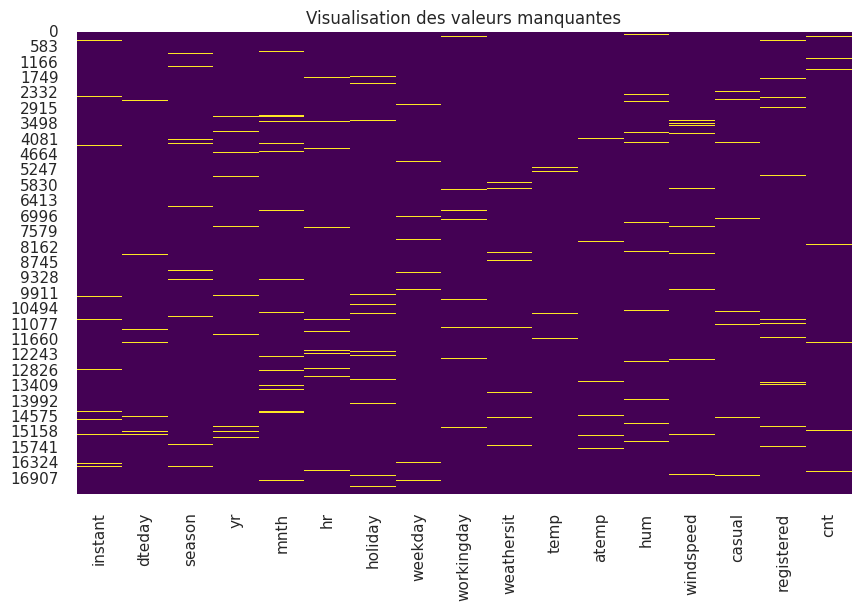

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#affichage avec heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()


In [10]:
#remplacement des valeurs manquantes
# Pour les colonnes num√©riques : remplissage par la m√©diane
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Pour les colonnes cat√©gorielles : remplissage par le mode
cat_cols = df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Pour les colonnes de dates : interpolation
if 'dteday' in df.columns:
    df['dteday'] = df['dteday'].interpolate()


/tmp/ipython-input-2210815228.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/tmp/ipython-input-2210815228.py:13: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['dteday'] = df['dteday'].interpolate()


In [11]:
print(df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
print(df.dtypes)

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday        object
workingday       bool
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object


In [13]:
# Colonnes num√©riques (√† standardiser/normaliser)
num_cols = [
    'instant', 'season', 'yr', 'mnth', 'hr',
    'holiday', 'weathersit', 'temp', 'atemp',
    'hum', 'windspeed', 'casual', 'registered', 'cnt'
]

# Standardisation (moyenne = 0, √©cart-type = 1)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler_standard.fit_transform(df[num_cols])

# Normalisation (entre 0 et 1)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = scaler_minmax.fit_transform(df[num_cols])

print("Standardized:")
print(df_standardized[num_cols].head())

print("\nNormalized:")
print(df_normalized[num_cols].head())


Standardized:
    instant    season        yr      mnth        hr   holiday  weathersit  \
0 -1.748619 -1.381714 -1.025021 -1.629418 -1.688223 -0.170694   -0.655998   
1 -1.748418 -1.381714 -1.025021 -1.629418 -1.542240 -0.170694   -0.655998   
2 -1.748216 -1.381714 -1.025021 -1.629418 -1.396258 -0.170694   -0.655998   
3 -1.748015 -1.381714 -1.025021 -1.629418 -1.250276 -0.170694   -0.655998   
4 -1.747813 -1.381714 -1.025021 -1.629418 -1.104294 -0.170694   -0.655998   

       temp     atemp       hum  windspeed    casual  registered       cnt  
0 -1.349052 -1.107976  0.959384  -1.571734 -0.661192   -0.934367 -0.960676  
1 -1.453859 -1.197383  0.907007  -1.571734 -0.558663   -0.807315 -0.827000  
2 -1.453859 -1.197383  0.907007  -1.571734 -0.620180   -0.840750 -0.871559  
3 -1.349052 -1.107976  0.645124  -1.571734 -0.661192   -0.954428 -0.977386  
4 -1.349052 -1.107976  0.645124  -1.571734 -0.722709   -1.014610 -1.044224  

Normalized:
    instant  season   yr  mnth        hr  holida

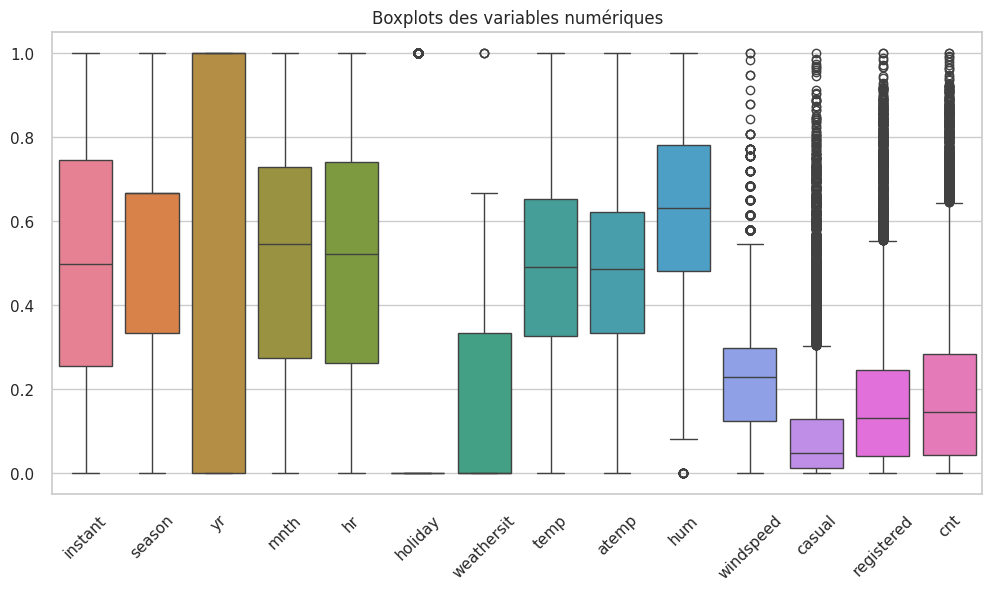

In [22]:
#traiter les valeurs aberrantes
# Liste des colonnes num√©riques
num_cols = df_normalized.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_normalized[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots des variables num√©riques")
plt.show()


In [14]:
# Colonnes num√©riques √† v√©rifier
cols_num = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

def traiter_outliers_iqr(df, cols):
    """
    D√©tection et traitement des valeurs aberrantes par capping (IQR).
    - Remplace les valeurs < borne_inf par borne_inf
    - Remplace les valeurs > borne_sup par borne_sup
    """
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Appliquer le capping
        df_clean[col] = np.where(df[col] < borne_inf, borne_inf,
                          np.where(df[col] > borne_sup, borne_sup, df[col]))
    return df_clean

# Application du traitement
df_clean = traiter_outliers_iqr(df, cols_num)

# V√©rification rapide
print("Avant traitement :")
print(df[cols_num].describe())
print("\nApr√®s traitement :")
print(df_clean[cols_num].describe())



Avant traitement :
               temp         atemp          hum     windspeed        casual  \
count  17484.000000  17484.000000  17484.00000  17484.000000  17484.000000   
mean       0.497434      0.476267      0.62683      0.190139     35.244109   
std        0.190832      0.170015      0.19093      0.120978     48.768058   
min        0.020000      0.000000      0.00000      0.000000      0.000000   
25%        0.340000      0.333300      0.48000      0.104500      4.000000   
50%        0.500000      0.484800      0.63000      0.194000     17.000000   
75%        0.660000      0.621200      0.78000      0.253700     47.000000   
max        1.000000      1.000000      1.00000      0.850700    367.000000   

         registered           cnt  
count  17484.000000  17484.000000  
mean     152.730096    188.477808  
std      149.549481    179.543014  
min        0.000000      1.000000  
25%       35.000000     42.000000  
50%      115.000000    142.000000  
75%      217.000000    277

In [16]:
# V√©rifier le nombre de lignes initiales
print(f"Nombre de lignes initiales : {df.shape[0]}")

# 1. Nombre total de doublons
nb_duplicated = df.duplicated().sum()
print(f"Nombre de lignes dupliqu√©es : {nb_duplicated}")

# 2. Afficher un √©chantillon des doublons (si existants)
if nb_duplicated > 0:
    print("\nExemple de doublons d√©tect√©s :")
    print(df[df.duplicated()].head())

# 3. Statistiques de base avant suppression
print("\nStatistiques avant suppression des doublons :")
print(df.describe())


Nombre de lignes initiales : 17484
Nombre de lignes dupliqu√©es : 105

Exemple de doublons d√©tect√©s :
       instant      dteday  season   yr  mnth    hr  holiday   weekday  \
17379   5607.0  2011-08-26     3.0  0.0   8.0  12.0      0.0  Vendredi   
17380   9369.0  2012-01-31     1.0  1.0   1.0   6.0      0.0     Mardi   
17381   4990.0  2011-07-31     3.0  0.0   7.0  19.0      0.0  Dimanche   
17382  16739.0  2012-12-05     4.0  1.0  12.0   5.0      0.0  Mercredi   
17383   3336.0  2011-05-23     2.0  0.0   5.0  21.0      0.0     Lundi   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17379        True         2.0  0.76  0.7273  0.66     0.1045    70.0   
17380        True         1.0  0.28  0.2727  0.52     0.1642     0.0   
17381       False         1.0  0.80  0.7576  0.55     0.3284    87.0   
17382        True         1.0  0.50  0.4848  0.59     0.2836     1.0   
17383        True         1.0  0.64  0.5758  0.89     0.2239    33.0   

       registered 

Nombre de lignes initiales : 17484
Nombre de doublons d√©tect√©s : 105

Nombre de lignes apr√®s suppression : 17379
Nombre de doublons restants : 0


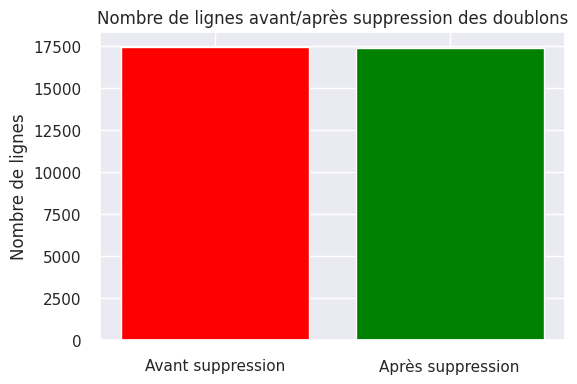

In [17]:

#Avant suppression
print(f"Nombre de lignes initiales : {df.shape[0]}")
print(f"Nombre de doublons d√©tect√©s : {df.duplicated().sum()}")

#Suppression des doublons
df_no_dup = df.drop_duplicates(keep="first")

print(f"\nNombre de lignes apr√®s suppression : {df_no_dup.shape[0]}")
print(f"Nombre de doublons restants : {df_no_dup.duplicated().sum()}")

# Visualisation
plt.figure(figsize=(6,4))
counts = [df.shape[0], df_no_dup.shape[0]]
labels = ["Avant suppression", "Apr√®s suppression"]

plt.bar(labels, counts, color=["red", "green"])
plt.title("Nombre de lignes avant/apr√®s suppression des doublons")
plt.ylabel("Nombre de lignes")
plt.show()




***Modeling***

üîπ M√©thodes supervis√©es (pr√©dire cnt)
1. R√©gression Lin√©aire Multiple

Pourquoi ?

C‚Äôest une m√©thode simple et interpr√©table, id√©ale comme baseline.

Elle permet de voir rapidement l‚Äôeffet de chaque variable (heure, m√©t√©o, saison) sur cnt.

Utile pour expliquer les r√©sultats √† un public non technique.

Limite : elle ne capture pas bien les relations non lin√©aires (exemple : hausse soudaine de la demande √† certaines heures).

2. Random Forest Regressor

Pourquoi ?

C‚Äôest un mod√®le robuste et performant pour les donn√©es tabulaires.

Il g√®re les relations non lin√©aires, les interactions complexes (exemple : effet combin√© pluie + heure de pointe).

Il fournit aussi une mesure d‚Äôimportance des variables ‚Üí utile pour savoir si la m√©t√©o ou l‚Äôheure est la plus influente.

Limite : un peu moins interpr√©table qu‚Äôune r√©gression lin√©aire.

üëâ Ces deux m√©thodes te donnent un √©quilibre :

R√©gression Lin√©aire ‚Üí baseline claire et interpr√©table.

Random Forest ‚Üí performance et robustesse.

üîπ M√©thodes non supervis√©es (explorer les patterns)
1. K-Means Clustering

Pourquoi ?

Pour regrouper automatiquement les heures/jours selon la demande (cnt).

Par exemple :

Cluster 1 ‚Üí heures creuses (nuit, matin t√¥t).

Cluster 2 ‚Üí heures de pointe (trajets travail).

Cluster 3 ‚Üí week-end / loisirs.

Tr√®s utile pour identifier des profils de comportements sans utiliser la variable cible.

Limite : il faut d√©finir le nombre de clusters √† l‚Äôavance (souvent avec la m√©thode du coude).

2. PCA (Analyse en Composantes Principales)

Pourquoi ?

R√©duit la dimensionnalit√© des donn√©es m√©t√©o (temp, atemp, hum, windspeed).

Permet de visualiser les relations complexes entre les variables sur 2D ou 3D.

Aide √† voir si certaines conditions m√©t√©o forment des sch√©mas sp√©cifiques de location.

Limite : c‚Äôest une m√©thode exploratoire, pas pr√©dictive ‚Üí mais tr√®s utile pour l‚Äôanalyse visuelle et la compr√©hension.

‚úÖ R√©sum√© des choix conseill√©s
Supervis√© :

R√©gression Lin√©aire Multiple (baseline, interpr√©tation).

Random Forest (mod√®le avanc√©, performant).

Non supervis√© :

K-Means (clustering des patterns d‚Äôutilisation).

PCA (visualisation et r√©duction de dimension).

***Evaluation***

***Depoloiement***